In [17]:
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from dewan_calcium.helpers import DewanCombineData

In [32]:
root_path = Path('Z:\\2_Inscopix\\1_DTT\\2_FMvHF')
experiments = list(root_path.iterdir())

data_folders = []
for each in experiments:
    data_path = each.joinpath('HF_FM_Analysis/CombinedData')
    data_folders.append(data_path)

spike_paths = []
denoised_data_paths = []

for each in data_folders:
    spike_file = list(each.glob('*spikes.pickle'))
    denoised_data_file = list(each.glob('*denoised_data.pickle'))
    spike_paths.extend(spike_file)
    denoised_data_paths.extend(denoised_data_file)

In [34]:
combined_spike_data = [DewanCombineData.load_data(file) for file in spike_paths]
comnbined_denoised_data = [DewanCombineData.load_data(file) for file in denoised_data_paths]

In [35]:
combined_spike_data_stacked = []
combined_denoised_data_stacked = []
for each in combined_spike_data:
    combined_spike_data_stacked.extend(each)
    
for each in comnbined_denoised_data:
    combined_denoised_data_stacked.extend(each)

In [ ]:
data_length = np.max([len(each) for each in combined_denoised_data_stacked])

fm_start = data_length / 3
fm_end = fm_start * 2

spike_ratios = []  # 1 -> All FM; 0 -> All Head Fixed

for i, each in enumerate(combined_spike_data_stacked):
    total_spikes = len(each)
    num_fm_spikes = len(np.where(np.logical_and(each >= fm_start, each < fm_end))[0])
    ratio = round(num_fm_spikes / total_spikes, 5)
    spike_ratios.append(ratio)

new_order = np.flip(np.argsort(spike_ratios))

sorted_peaks = []
sorted_ratios = []
for index in new_order:
    sorted_peaks.append(combined_spike_data_stacked[index])
    sorted_ratios.append(spike_ratios[index])
    

In [48]:
bins = [0.98, 0.84, 0.16, .02]

cells_per_bin = []
bin_indexes = []

for bin_value in bins:
    cell_indexes = np.where(np.greater_equal(sorted_ratios, bin_value))[0]
    cells_per_bin.append(len(cell_indexes))
    line_index = cell_indexes[-1] + 0.5
    bin_indexes.append(line_index)

In [49]:
cells_per_bin

[3, 9, 85, 93]

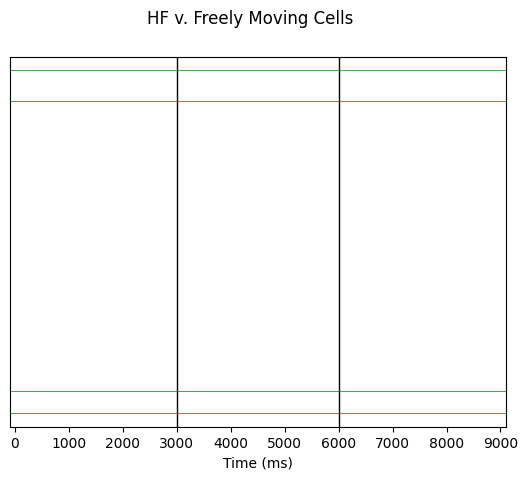

In [46]:
fig, ax = plt.subplots()

x_lim_min = -data_length * 0.01
x_lim_max = data_length * 1.01

for i, peaks in enumerate(sorted_peaks):
    y_vals = [i] * len(peaks)
    ax.scatter(peaks, y_vals, marker="_", c='k', s=0.5)

ax.vlines([3000, 6000], ymin=-1, ymax=len(sorted_peaks) + 1, color='k', lw=1)
ax.hlines(bin_indexes, xmin=x_lim_min, xmax=x_lim_max, color='g', lw=0.5)

ax.set_xticks(np.arange(0, 10000, 1000))
ax.set_yticks([])

ax.set_xlabel('Time (ms)')

ax.set_ylim([-1, len(sorted_peaks) + 1])
ax.set_xlim([(-data_length * .01), (data_length * 1.01)])

plt.suptitle("HF v. Freely Moving Cells")

fig.savefig('test.pdf')